# FastSAM for Multiple Object Tracking

In [16]:
from ultralytics.models.fastsam import FastSAMPredictor

# Create FastSAMPredictor
overrides = dict(conf=0.25, task="segment", mode="predict", model="FastSAM-x.pt", save=False, imgsz=1024)
predictor = FastSAMPredictor(overrides=overrides)

# Segment everything
everything_results = predictor("C:/Users/dnnxl/Documents/GitHub/drone-sort/dataset/DJI_20240308110115_0005_V/valid/images/frame_00033.png")
bbox_results = predictor.prompt(everything_results, bboxes=[[0.22916, 434.13, 265.15, 736.21],
                                                            [696.10, 298.15, 1031.1, 595.00],
                                                            [1207.2, 221.71, 1557.1, 561.66],
                                                            [1742.1, 571.66, 1920.00, 849.01],
                                                            [231.90, 497.49, 493.46, 785.87],
                                                            [84.33, 968.84, 321.61, 1083.9],
                                                            [1015.6, 567.66, 1190.9, 735.08]])


Ultralytics 8.3.11  Python-3.8.18 torch-2.1.0 CPU (12th Gen Intel Core(TM) i5-1235U)
YOLOv8x-seg summary (fused): 295 layers, 72,203,813 parameters, 0 gradients, 345.9 GFLOPs
image 1/1 C:\Users\dnnxl\Documents\GitHub\drone-sort\dataset\DJI_20240308110115_0005_V\valid\images\frame_00033.png: 608x1024 95 objects, 16567.0ms
Speed: 198.0ms preprocess, 16567.0ms inference, 907.9ms postprocess per image at shape (1, 3, 608, 1024)


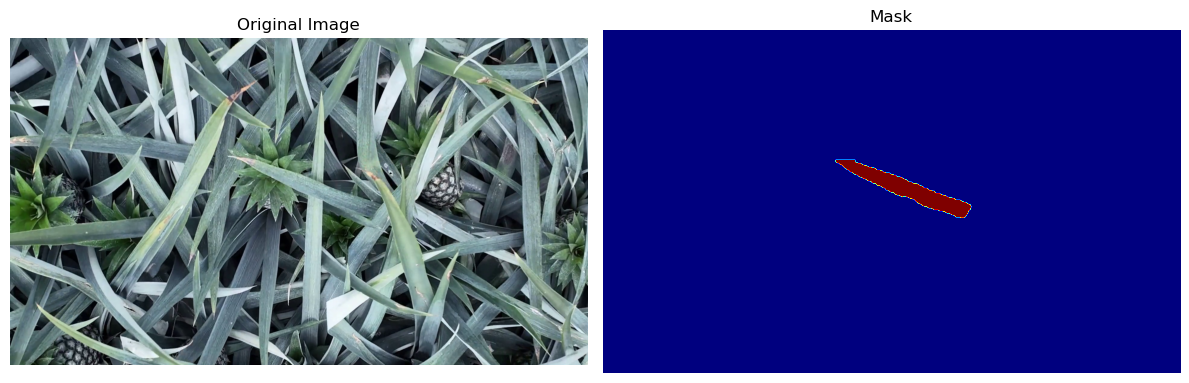

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Load the image
image_path = "C:/Users/dnnxl/Documents/GitHub/drone-sort/dataset/DJI_20240308110115_0005_V/valid/images/frame_00033.png"
image = Image.open(image_path)
image = np.array(image)

# Extract the mask
mask = bbox_results[0].masks.data.numpy()

# Normalize the mask (if necessary)
mask_normalized = mask / mask.max()

# Create a figure with two subplots
plt.figure(figsize=(12, 6))  # Adjust figure size as needed

# Plot the original image on the left
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')  # Hide axes

# Plot the mask on the right
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.imshow(mask_normalized[2], cmap='jet')  # Use the first channel of the mask
plt.title('Mask')
plt.axis('off')  # Hide axes

# Display the figure
plt.tight_layout()  # Adjust spacing between subplots
plt.show()

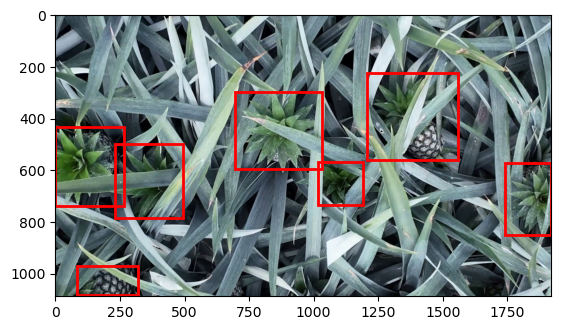

In [48]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define the bounding boxes
bounding_boxes = [
    [0.22916, 434.13, 265.15, 736.21],
    [696.10, 298.15, 1031.1, 595.00],
    [1207.2, 221.71, 1557.1, 561.66],
    [1742.1, 571.66, 1920.00, 849.01],
    [231.90, 497.49, 493.46, 785.87],
    [84.33, 968.84, 321.61, 1083.9],
    [1015.6, 567.66, 1190.9, 735.08]
]

# Create a blank white image
image = cv2.imread("C:/Users/dnnxl/Documents/GitHub/drone-sort/dataset/DJI_20240308110115_0005_V/valid/images/frame_00033.png")  # Load your image here
if image is None:
    image = 255 * np.ones((1200, 1920, 3), dtype=np.uint8)  # Fallback to a blank white image

# Create a figure and axis
fig, ax = plt.subplots(1)
ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib

# Plot each bounding box
for box in bounding_boxes:
    x_min, y_min, x_max, y_max = box
    width = x_max - x_min
    height = y_max - y_min
    rect = patches.Rectangle((x_min, y_min), width, height, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

# Display the image with bounding boxes
plt.show()

Fastsam with one example

In [14]:
from ultralytics import FastSAM

# Define an inference source
source = "C:/Users/dnnxl/Documents/GitHub/drone-sort/dataset/DJI_20240308110115_0005_V/valid/images/frame_00033.png"

# Create a FastSAM model
model = FastSAM("FastSAM-x.pt")  # or FastSAM-x.pt

# Run inference on an image
#everything_results = model(source, device="cpu", retina_masks=True, imgsz=1024, conf=0.4, iou=0.9, save=True)

# Run inference with bboxes and points and texts prompt at the same time
results = model(source, device="cpu", bboxes=[1742.1, 571.66, 1920.00, 849.01], retina_masks=True, imgsz=1024, conf=0.4, iou=0.9, save=True)


image 1/1 C:\Users\dnnxl\Documents\GitHub\drone-sort\dataset\DJI_20240308110115_0005_V\valid\images\frame_00033.png: 608x1024 1 object, 1008.7ms
Speed: 27.8ms preprocess, 1008.7ms inference, 3909.7ms postprocess per image at shape (1, 3, 608, 1024)
Results saved to runs\segment\predict9


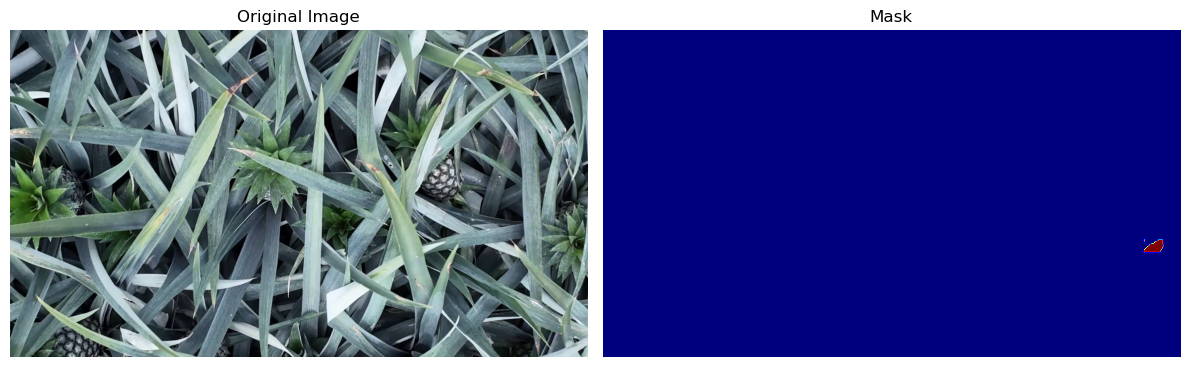

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Load the image
image_path = "C:/Users/dnnxl/Documents/GitHub/drone-sort/dataset/DJI_20240308110115_0005_V/valid/images/frame_00033.png"
image = Image.open(image_path)
image = np.array(image)

# Extract the mask
mask = results[0].masks.data.numpy()

# Normalize the mask (if necessary)
mask_normalized = mask / mask.max()

# Create a figure with two subplots
plt.figure(figsize=(12, 6))  # Adjust figure size as needed

# Plot the original image on the left
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')  # Hide axes

# Plot the mask on the right
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.imshow(mask_normalized[0], cmap='jet')  # Use the first channel of the mask
plt.title('Mask')
plt.axis('off')  # Hide axes

# Display the figure
plt.tight_layout()  # Adjust spacing between subplots
plt.show()